In [10]:
# Import Packages
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

In [12]:
# Pull in WR data
df1 = pd.read_csv('receiving_data.csv', na_values=r'-')

In [13]:
# Describe the Data
df1.describe()

,YAR,DVOA,VOA,passes,yards,Eyds,TD,catch_rate,fum,year,catches,yds_per_catch,DYAR_per_catch,Eyds_per_catch,DYAR
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000
mean,62.695716,-0.013838,-0.014256,59.812900,443.416051,445.151157,2.592811,0.658134,0.402265,2014.871000,38.126539,10.769719,1.062531,10.353176,62.953717
std,106.004512,0.239967,0.245301,41.004343,363.198067,393.796701,2.897787,0.121170,0.685655,2.935111,25.471074,3.708425,2.727687,4.907494,105.366729
min,-199.000000,-0.995000,-1.017000,9.000000,14.000000,-127.000000,0.000000,0.170000,0.000000,2010.000000,2.000000,2.000000,-23.200000,-28.800000,-219.000000
25%,-5.000000,-0.148500,-0.153500,24.000000,148.000000,131.000000,0.000000,0.580000,0.000000,2012.000000,17.000000,7.800000,-0.200000,7.200000,-3.000000
50%,36.000000,-0.009000,-0.008000,53.000000,343.000000,329.000000,2.000000,0.660000,0.000000,2015.000000,34.000000,10.500000,1.300000,10.900000,36.000000
75%,109.000000,0.124000,0.126000,86.000000,654.500000,660.000000,4.000000,0.740000,1.000000,2017.000000,53.000000,13.500000,2.600000,13.800000,109.000000
max,577.000000,1.082000,1.121000,203.000000,1964.000000,2061.000000,16.000000,1.000000,4.000000,2019.000000,150.000000,37.100000,13.900000,30.000000,570.000000


In [14]:
# More info on data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 17 columns):
player            2031 non-null object
team              2031 non-null object
YAR               2031 non-null int64
DVOA              2031 non-null float64
VOA               2031 non-null float64
passes            2031 non-null int64
yards             2031 non-null int64
Eyds              2031 non-null int64
TD                2031 non-null int64
catch_rate        2031 non-null float64
fum               2031 non-null int64
year              2031 non-null int64
catches           2031 non-null int64
yds_per_catch     2031 non-null float64
DYAR_per_catch    2031 non-null float64
Eyds_per_catch    2031 non-null float64
DYAR              2031 non-null int64
dtypes: float64(6), int64(9), object(2)
memory usage: 269.9+ KB


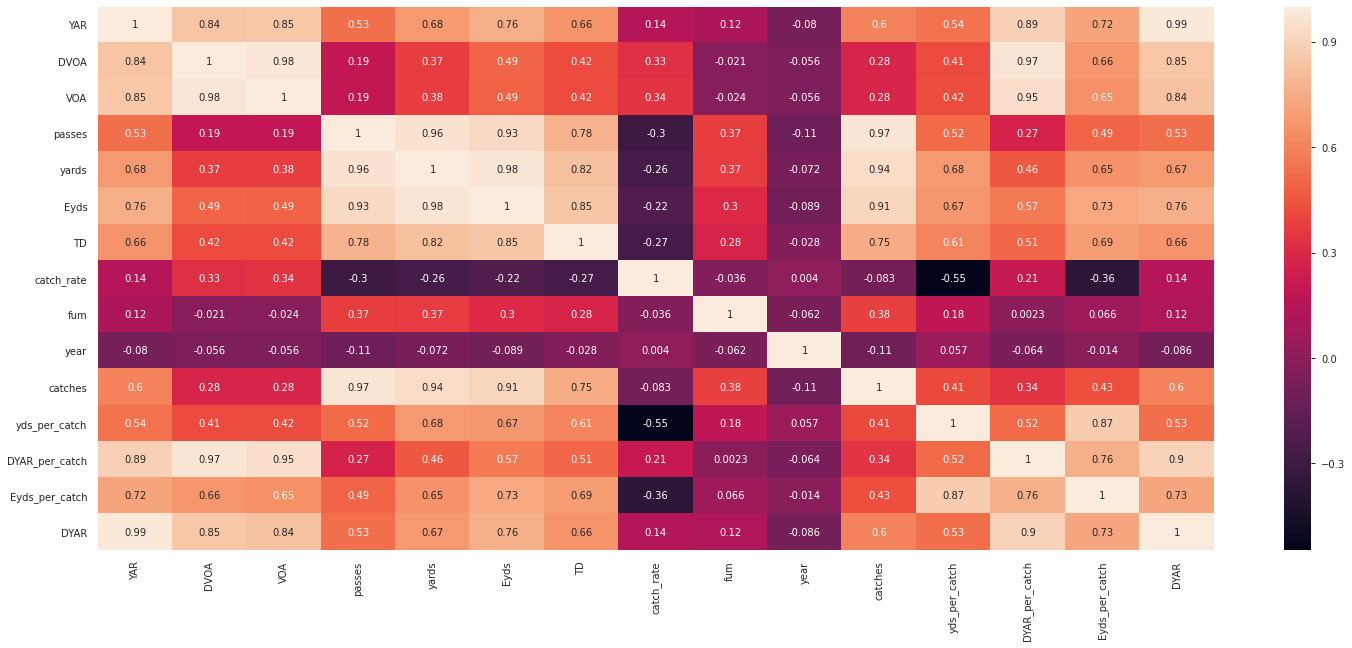

In [15]:
# Correlation Heatmap for the data
spearman =df1.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

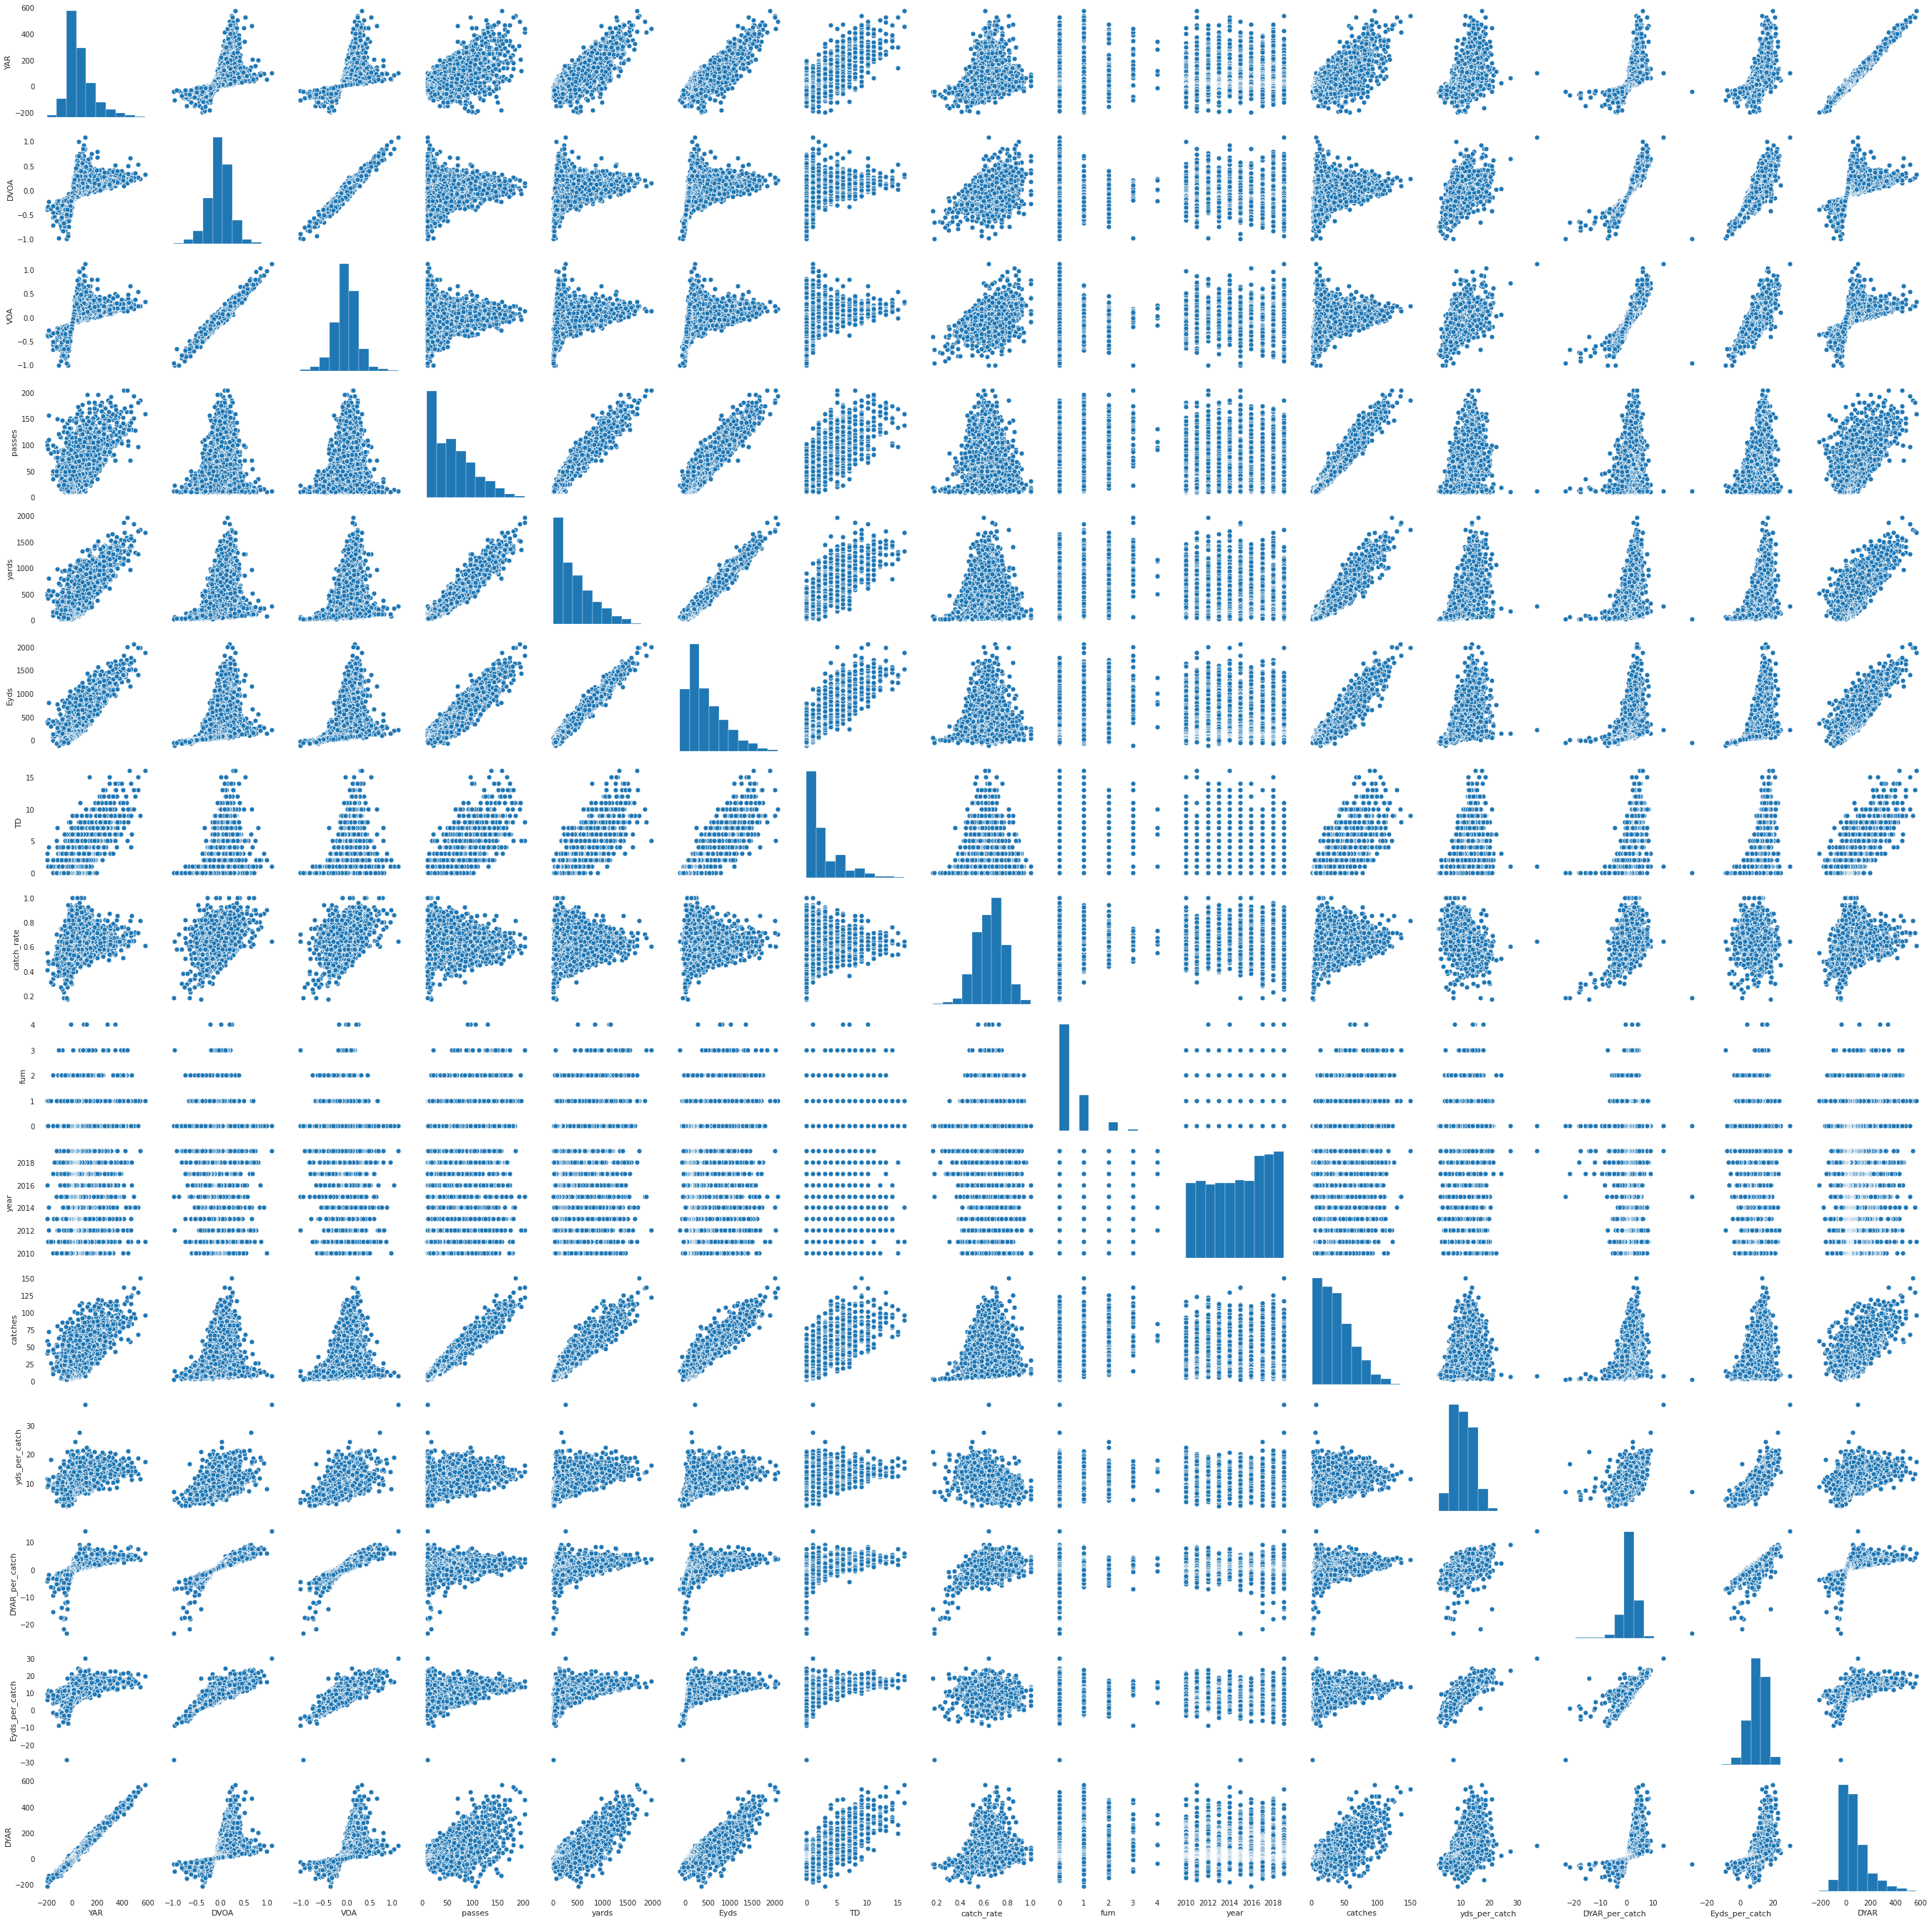

In [7]:
numerical_list=['YAR','DVOA','VOA','passes','yards','Eyds','TD','catch_rate','fum','year','catches','yds_per_catch','DYAR_per_catch','Eyds_per_catch','DYAR']
sns.pairplot(df1[numerical_list])

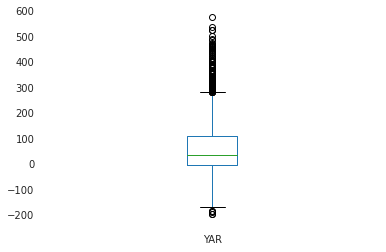

In [16]:
# Add Box Plots to further Describe the Data
# For YAR
df_p=df1.iloc[:,2]
df_p.plot.box()

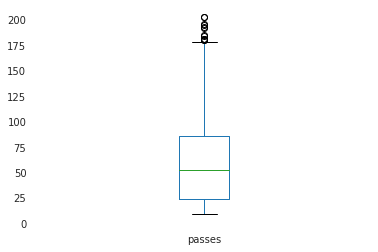

In [17]:
# Add Box Plots to further Describe the Data
# For passes
df_p=df1.iloc[:,5]
df_p.plot.box()

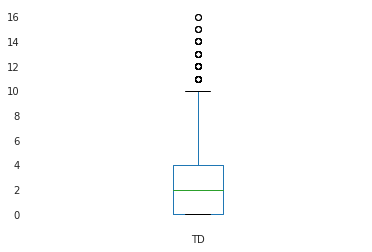

In [18]:
# Add Box Plots to further Describe the Data
# For TDs
df_p=df1.iloc[:,8]
df_p.plot.box()

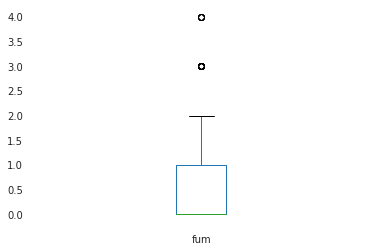

In [19]:
# Add Box Plots to further Describe the Data
# For fum
df_p=df1.iloc[:,10]
df_p.plot.box()

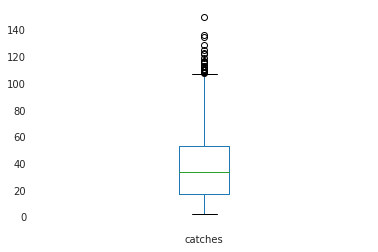

In [20]:
# Add Box Plots to further Describe the Data
# For catches
df_p=df1.iloc[:,12]
df_p.plot.box()

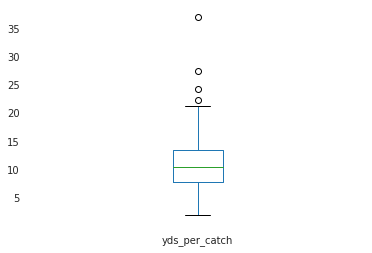

In [21]:
# Add Box Plots to further Describe the Data
# For yds_per_catch
df_p=df1.iloc[:,13]
df_p.plot.box()

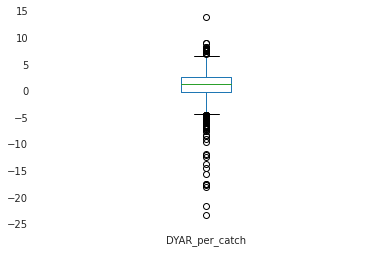

In [22]:
# Add Box Plots to further Describe the Data
# For DYAR_per_catch
df_p=df1.iloc[:,14]
df_p.plot.box()

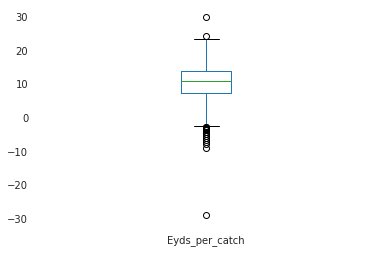

In [23]:
# Add Box Plots to further Describe the Data
# For Eyds_per_catch
df_p=df1.iloc[:,15]
df_p.plot.box()

In [24]:
# check to see if any missing data
display(df1.isna().sum())

player            0
team              0
YAR               0
DVOA              0
VOA               0
passes            0
yards             0
Eyds              0
TD                0
catch_rate        0
fum               0
year              0
catches           0
yds_per_catch     0
DYAR_per_catch    0
Eyds_per_catch    0
DYAR              0
dtype: int64

## Data Prep

In [25]:
# Subsetting the data to be used for modeling
display(df1.dtypes)
df1_list =  df1.columns
df1_list

player             object
team               object
YAR                 int64
DVOA              float64
VOA               float64
passes              int64
yards               int64
Eyds                int64
TD                  int64
catch_rate        float64
fum                 int64
year                int64
catches             int64
yds_per_catch     float64
DYAR_per_catch    float64
Eyds_per_catch    float64
DYAR                int64
dtype: object

Index(['player', 'team', 'YAR', 'DVOA', 'VOA', 'passes', 'yards', 'Eyds', 'TD',
       'catch_rate', 'fum', 'year', 'catches', 'yds_per_catch',
       'DYAR_per_catch', 'Eyds_per_catch', 'DYAR'],
      dtype='object')

In [26]:
df1_list = df1_list.drop(['DYAR'])

In [27]:
df1_list

Index(['player', 'team', 'YAR', 'DVOA', 'VOA', 'passes', 'yards', 'Eyds', 'TD',
       'catch_rate', 'fum', 'year', 'catches', 'yds_per_catch',
       'DYAR_per_catch', 'Eyds_per_catch'],
      dtype='object')

In [40]:
# # Encode Total_Value before splitting the data to allow for modeling

# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# df1['Total_Value'] = enc.fit_transform(df1['Total_Value'])

In [29]:
# # Splitting the data in to X and y
features=['player', 'team', 'YAR', 'DVOA', 'VOA', 'passes', 'yards', 'Eyds', 'TD', 'catch_rate', 'fum', 'year', 'catches', 'yds_per_catch','DYAR_per_catch', 'Eyds_per_catch']
X=df1[features]
y=df1.DYAR

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)


In [30]:
# print(X_train.shape)

In [31]:
# y_train

Normalization

In [32]:
X_col_list= X.columns.tolist()
X_col_list

['player',
 'team',
 'YAR',
 'DVOA',
 'VOA',
 'passes',
 'yards',
 'Eyds',
 'TD',
 'catch_rate',
 'fum',
 'year',
 'catches',
 'yds_per_catch',
 'DYAR_per_catch',
 'Eyds_per_catch']

In [34]:
# Subset X between categorical and continuous features

X_continuous = ['YAR','DVOA','VOA','passes','yards','Eyds','TD','catch_rate','fum','year','catches','yds_per_catch','DYAR_per_catch','Eyds_per_catch','DYAR']
X_categorical = ['player','team']
X_continuous_df = X.loc[:,X_continuous]
X_categorical_df = X.loc[:,X_categorical]

In [35]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(X_continuous_df.skew())

#filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_under = skew_df[(skew_df < -0.5).any(axis=1)]
display(skew_over.index)
display(skew_under.index)
total_skew_df = pd.concat([skew_over, skew_under])

skew_cols = total_skew_df.index.tolist()

Index(['YAR', 'passes', 'yards', 'Eyds', 'TD', 'fum', 'catches'], dtype='object')

Index(['DYAR_per_catch', 'Eyds_per_catch'], dtype='object')

In [36]:
skew_cols

['YAR',
 'passes',
 'yards',
 'Eyds',
 'TD',
 'fum',
 'catches',
 'DYAR_per_catch',
 'Eyds_per_catch']

In [37]:
# creating the list of cols to adjust for skewness

for i in skew_cols:
    X[i+'_skew'] = X[i]
    
    
cols_to_skew = X.iloc[:,-12:].columns

In [38]:
cols_to_skew

Index(['yds_per_catch', 'DYAR_per_catch', 'Eyds_per_catch', 'YAR_skew',
       'passes_skew', 'yards_skew', 'Eyds_skew', 'TD_skew', 'fum_skew',
       'catches_skew', 'DYAR_per_catch_skew', 'Eyds_per_catch_skew'],
      dtype='object')

In [39]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X[cols_to_skew],random_state=0,copy=True,n_quantiles=50)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
X[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [40]:
display(X[cols_to_skew].skew())

yds_per_catch         -0.003927
DYAR_per_catch        -0.006859
Eyds_per_catch         0.003394
YAR_skew               0.002504
passes_skew            0.001022
yards_skew            -0.004160
Eyds_skew              0.000683
TD_skew               -0.161903
fum_skew               0.864226
catches_skew           0.001500
DYAR_per_catch_skew   -0.006859
Eyds_per_catch_skew    0.003394
dtype: float64

In [41]:
# review data types to ensure all data is processed for modeling
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 25 columns):
player                 2031 non-null object
team                   2031 non-null object
YAR                    2031 non-null int64
DVOA                   2031 non-null float64
VOA                    2031 non-null float64
passes                 2031 non-null int64
yards                  2031 non-null int64
Eyds                   2031 non-null int64
TD                     2031 non-null int64
catch_rate             2031 non-null float64
fum                    2031 non-null int64
year                   2031 non-null int64
catches                2031 non-null int64
yds_per_catch          2031 non-null float64
DYAR_per_catch         2031 non-null float64
Eyds_per_catch         2031 non-null float64
YAR_skew               2031 non-null float64
passes_skew            2031 non-null float64
yards_skew             2031 non-null float64
Eyds_skew              2031 non-null float64
TD_skew    

In [42]:
# Encode the categorical variables that remain bool or object for modeling

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X['player'] = enc.fit_transform(X['player'])
X['team'] = enc.fit_transform(X['team'])

In [43]:
X[['player','team']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 2 columns):
player    2031 non-null int64
team      2031 non-null int64
dtypes: int64(2)
memory usage: 31.9 KB


In [44]:
col_list = X.columns

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 25 columns):
player                 2031 non-null int64
team                   2031 non-null int64
YAR                    2031 non-null int64
DVOA                   2031 non-null float64
VOA                    2031 non-null float64
passes                 2031 non-null int64
yards                  2031 non-null int64
Eyds                   2031 non-null int64
TD                     2031 non-null int64
catch_rate             2031 non-null float64
fum                    2031 non-null int64
year                   2031 non-null int64
catches                2031 non-null int64
yds_per_catch          2031 non-null float64
DYAR_per_catch         2031 non-null float64
Eyds_per_catch         2031 non-null float64
YAR_skew               2031 non-null float64
passes_skew            2031 non-null float64
yards_skew             2031 non-null float64
Eyds_skew              2031 non-null float64
TD_skew      

In [46]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 

In [47]:
#define new dataframe, df_Prepped, which contains all the features, as adjusted per the Data Preparation above, along with the target variables from the initial dataframe

df_Prepped = pd.concat([X,y],axis=1)

#check new dataframe, df_Prepped                
df_Prepped.head()



,player,team,YAR,DVOA,VOA,passes,yards,Eyds,TD,catch_rate,...,YAR_skew,passes_skew,yards_skew,Eyds_skew,TD_skew,fum_skew,catches_skew,DYAR_per_catch_skew,Eyds_per_catch_skew,DYAR
0,409,2,182,-0.013,0.014,161,1156,1270,6,0.68,...,0.878920,0.980707,0.946035,0.953126,0.867347,0.806122,0.982722,0.510204,0.561224,147
1,649,15,60,-0.038,-0.056,109,966,801,4,0.52,...,0.616327,0.865889,0.891909,0.818141,0.744898,0.959184,0.782313,0.510204,0.775510,75
2,30,8,88,-0.064,-0.051,143,1086,1063,8,0.52,...,0.702624,0.956884,0.928910,0.910881,0.938776,0.959184,0.897959,0.448980,0.789116,73
3,8,31,389,0.201,0.170,163,1533,1703,9,0.62,...,0.982308,0.981626,0.984691,0.987617,0.959184,0.989796,0.978584,0.928571,0.935374,430
4,463,12,385,0.338,0.326,107,1101,1276,9,0.57,...,0.981931,0.860058,0.932864,0.953929,0.959184,0.000000,0.814966,0.981805,0.983709,395


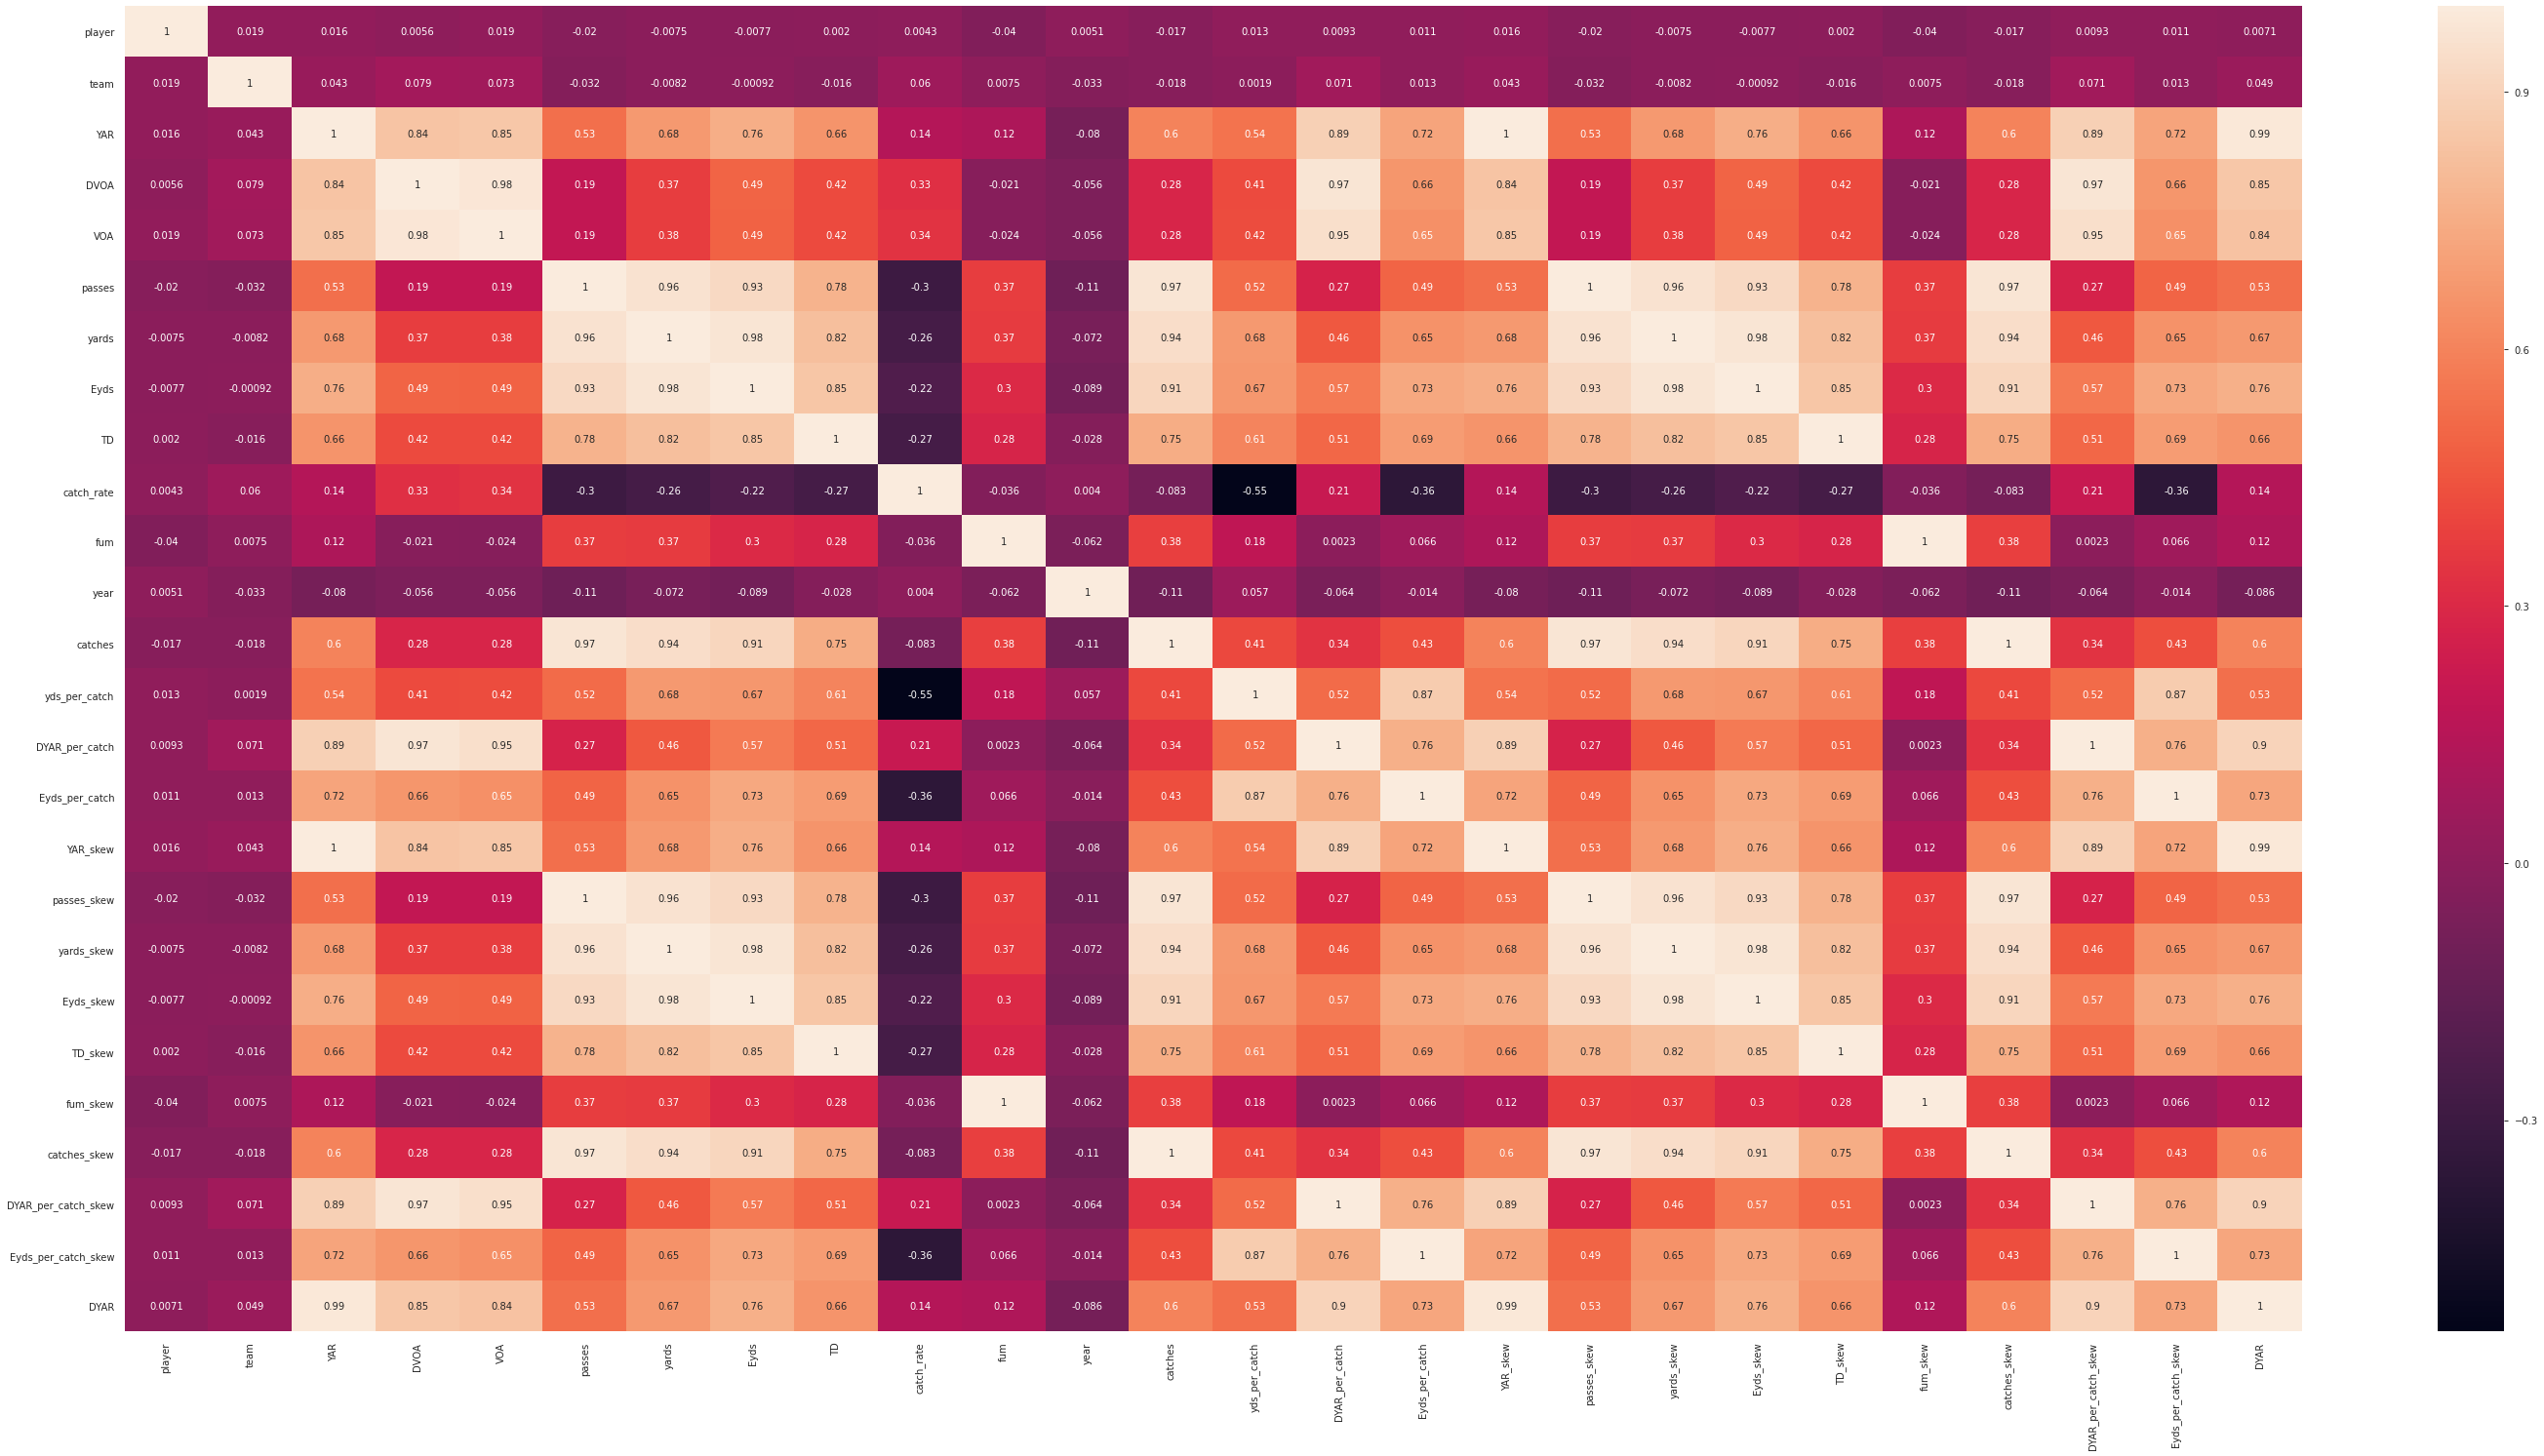

In [48]:
#Correlation Heatmap for the dataframe
spearman =df_Prepped.corr(method ='spearman')
plt.figure(figsize=(50,25))
sns.heatmap(spearman, annot=True)

In [49]:
corr_df = pd.DataFrame(X.corrwith(df_Prepped['DYAR']))

#filter skew attributes by absolute values of 0.5

corr_over = corr_df[(corr_df > 0.09).any(axis=1)]
corr_under = corr_df[(corr_df < -0.09).any(axis=1)]
display(corr_over.index)
display(corr_under.index)

corr_with_df = pd.concat([corr_over, corr_under])

model_cols = corr_with_df.index.tolist()
model_cols

Index(['YAR', 'DVOA', 'VOA', 'passes', 'yards', 'Eyds', 'TD', 'catch_rate',
       'fum', 'catches', 'yds_per_catch', 'DYAR_per_catch', 'Eyds_per_catch',
       'YAR_skew', 'passes_skew', 'yards_skew', 'Eyds_skew', 'TD_skew',
       'fum_skew', 'catches_skew', 'DYAR_per_catch_skew',
       'Eyds_per_catch_skew'],
      dtype='object')

Index([], dtype='object')

['YAR',
 'DVOA',
 'VOA',
 'passes',
 'yards',
 'Eyds',
 'TD',
 'catch_rate',
 'fum',
 'catches',
 'yds_per_catch',
 'DYAR_per_catch',
 'Eyds_per_catch',
 'YAR_skew',
 'passes_skew',
 'yards_skew',
 'Eyds_skew',
 'TD_skew',
 'fum_skew',
 'catches_skew',
 'DYAR_per_catch_skew',
 'Eyds_per_catch_skew']

In [58]:
# determined possible features list by removing corresponding, duplicative features that were not adjusted for skewness
 
possible_Features_list =['catch_rate',
'DVOA',
'VOA',
'passes_skew',
 'yards_skew',
 'Eyds_skew',
 'TD_skew',
 'fum_skew',
 'catches_skew',
 'DYAR_per_catch_skew',
 'Eyds_per_catch_skew','DYAR']    


In [59]:
#Correlation Heatmap for the dataframe
possible_Corr_df = df_Prepped.loc[:,possible_Features_list]
possible_Corr_df


,catch_rate,DVOA,VOA,passes_skew,yards_skew,Eyds_skew,TD_skew,fum_skew,catches_skew,DYAR_per_catch_skew,Eyds_per_catch_skew,DYAR
0,0.68,-0.013,0.014,0.980707,0.946035,0.953126,0.867347,0.806122,0.982722,0.510204,0.561224,147
1,0.52,-0.038,-0.056,0.865889,0.891909,0.818141,0.744898,0.959184,0.782313,0.510204,0.775510,75
2,0.52,-0.064,-0.051,0.956884,0.928910,0.910881,0.938776,0.959184,0.897959,0.448980,0.789116,73
3,0.62,0.201,0.170,0.981626,0.984691,0.987617,0.959184,0.989796,0.978584,0.928571,0.935374,430
4,0.57,0.338,0.326,0.860058,0.932864,0.953929,0.959184,0.000000,0.814966,0.981805,0.983709,395
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,0.60,-0.634,-0.636,0.020408,0.008503,0.018522,0.000000,0.000000,0.020408,0.020408,0.018630,-30
2027,0.82,-0.749,-0.696,0.040816,0.006803,0.016635,0.000000,0.000000,0.091837,0.038095,0.018558,-33
2028,0.63,-0.503,-0.613,0.142857,0.027829,0.023810,0.000000,0.000000,0.122449,0.039456,0.023810,-36
2029,0.58,-0.936,-0.659,0.061224,0.016156,0.012348,0.000000,0.000000,0.040816,0.018390,0.015210,-47


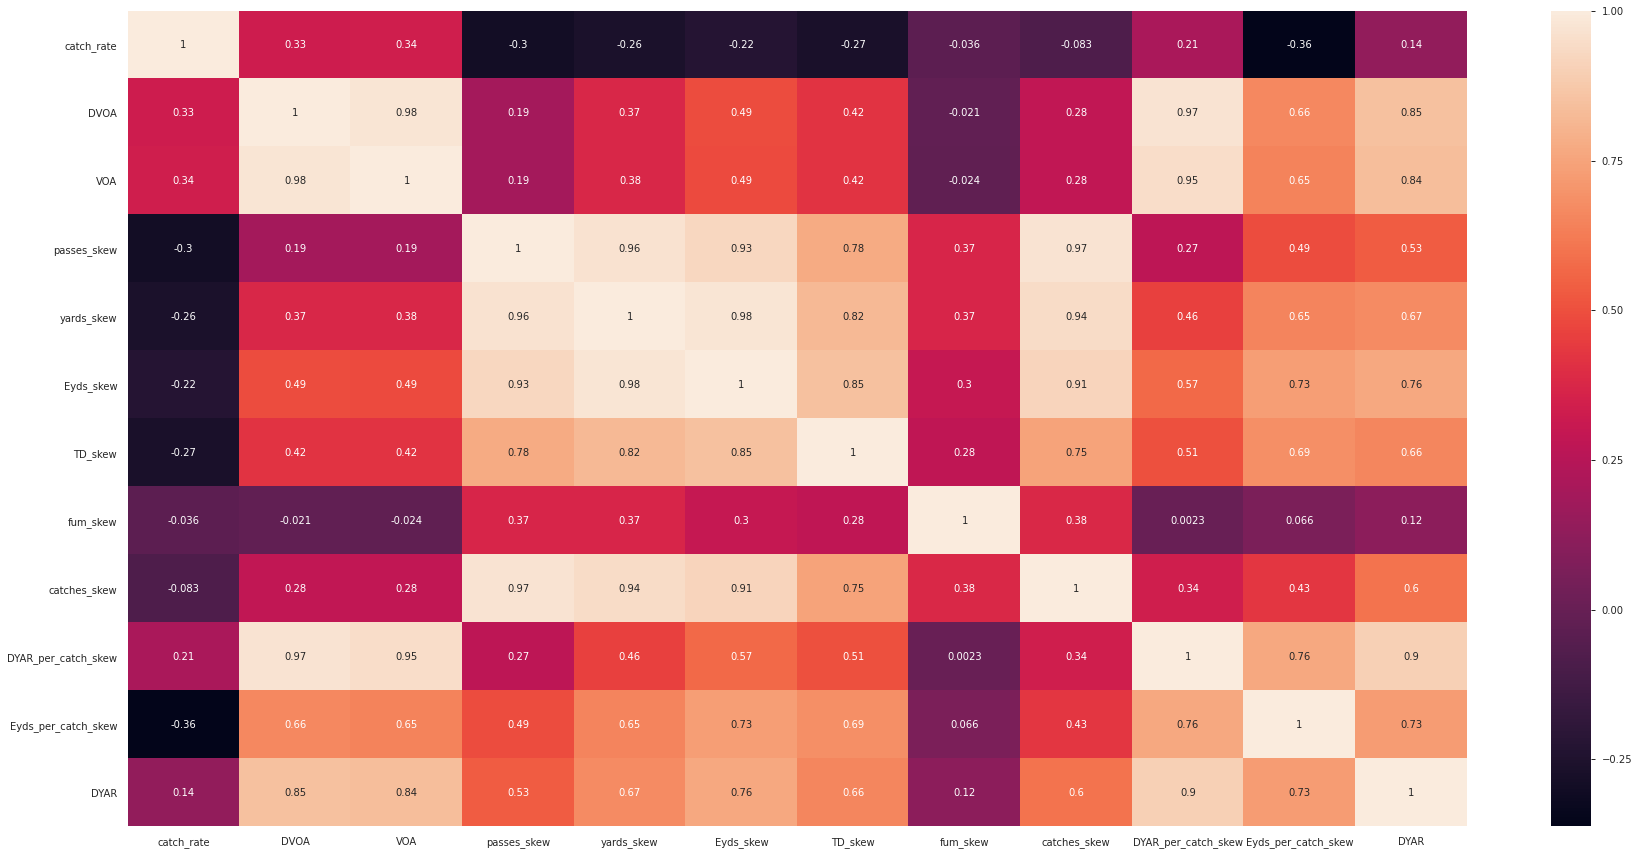

In [60]:
spearman_possible =possible_Corr_df.corr(method ='spearman')
plt.figure(figsize=(30,15))
sns.heatmap(spearman_possible, annot=True)

In [86]:
# Filtered out intercorrelated featues for feature importance
feature_importance_list = ['catch_rate',
'DVOA',
'passes_skew',
 'yards_skew',
 'Eyds_skew',
 'TD_skew',
 'fum_skew',
 'catches_skew',
 'Eyds_per_catch_skew']



In [87]:
# # Split the df_Models dataset
X_Models,y_Models = possible_Corr_df.loc[:,feature_importance_list],possible_Corr_df.iloc[:,-1]

# Set the training at 30% (as above for baseline) given the modest size of the dataset (~12,000 observations)
X_Models_train, X_Models_test, y_Models_train, y_Models_test = train_test_split(X_Models, y_Models, test_size=0.3,random_state=500) 

#print out the first five rows of the training data
display(X_Models_train.head(),y_Models_train.head())

,catch_rate,DVOA,passes_skew,yards_skew,Eyds_skew,TD_skew,fum_skew,catches_skew,Eyds_per_catch_skew
1620,0.77,-0.273,0.357143,0.299392,0.156556,0.000000,0.000000,0.408163,0.077098
811,0.59,-0.041,0.632653,0.617647,0.671789,0.377551,0.000000,0.612245,0.704082
1379,0.50,-0.418,0.061224,0.016156,0.035714,0.000000,0.000000,0.020408,0.047140
1332,0.65,-0.255,0.326531,0.236562,0.158513,0.000000,0.806122,0.306122,0.099843
330,0.54,0.206,0.771429,0.903823,0.863369,0.551020,0.000000,0.704082,0.980308


1620    -25
811      49
1379    -21
1332    -20
330     235
Name: DYAR, dtype: int64

#### XGBoost Model

In [88]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Step 1: Specify the Model

In [89]:
#Instantiate an XGBoost Classifer Model - for DYAR
XGB_class = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)


Steps 2-4: Generate Test Data, Build the Models & Assess the Models for Total_Value

In [90]:
#Put Data into structure for XGBoost- for Total_Value 
data_dmatrix = xgb.DMatrix(data=X_Models,label=y_Models)

#Train the model using the training sets for Total_Value
XGB_class.fit(X_Models_train, y_Models_train)

#Predict the response for test dataset for Total_Value
y_XGB_pred = XGB_class.predict(X_Models_test)

#Calculate RMSE for Total_Value
rmse_XGB = np.sqrt(mean_squared_error(y_Models_test, y_XGB_pred))
print("XGBoost's RMSE for Total_Value is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for Total_Value
target_range_XGB = y_Models.max() - y_Models.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for Total_Value is: %f" % (error_ratio_XGB))

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoost's RMSE for Total_Value is: 33.083278
XGB target range is: 789.000000
XGBoost's Error Ratio for Total_Value is: 0.041931


#### Regression Model

In [91]:
# Code for feature selection using scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_Models_train,y_Models_train)

feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.404258
4    0.208909
8    0.158767
3    0.072540
7    0.046265
5    0.042082
2    0.037370
0    0.020253
6    0.009556
dtype: float64

In [93]:
X_Models_train.iloc[:,[1,4,8,3,7,5,2,0,6]].head()

,DVOA,Eyds_skew,Eyds_per_catch_skew,yards_skew,catches_skew,TD_skew,passes_skew,catch_rate,fum_skew
1620,-0.273,0.156556,0.077098,0.299392,0.408163,0.000000,0.357143,0.77,0.000000
811,-0.041,0.671789,0.704082,0.617647,0.612245,0.377551,0.632653,0.59,0.000000
1379,-0.418,0.035714,0.047140,0.016156,0.020408,0.000000,0.061224,0.50,0.000000
1332,-0.255,0.158513,0.099843,0.236562,0.306122,0.000000,0.326531,0.65,0.806122
330,0.206,0.863369,0.980308,0.903823,0.704082,0.551020,0.771429,0.54,0.000000


In [94]:
import statsmodels.api as sm

features=['DVOA','Eyds_per_catch_skew','Eyds_skew','yards_skew','passes_skew','catch_rate','catches_skew','TD_skew','fum_skew']
X_imp=possible_Corr_df[features]
y_imp=possible_Corr_df.DYAR

X_train_feat,X_test_feat,y_train_feat,y_test_feat=train_test_split(X_imp,y_imp,test_size=0.25,random_state=2019)

model = sm.OLS(y_train_feat, X_train_feat).fit()
predictions = model.predict(X_Models_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   DYAR   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              585.5
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                        0.00
Time:                        06:12:46   Log-Likelihood:                         -8351.8
No. Observations:                1523   AIC:                                  1.672e+04
Df Residuals:                    1514   BIC:                                  1.677e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
DVOA                   29.0081     12.866      2.255      0.024       3.771      54.245
Eyds_per_catch_skew    72.7626     17.349      4.194      0.000      38.732     106.793
Eyds_skew             240.6439     41.166      5.846      0.000     159.896     321.392
yards_skew            106.2769     37.077      2.866      0.004      33.548     179.005
passes_skew          -738.2320     46.047    -16.032      0.000    -828.554    -647.910
catch_rate           -103.8799      7.666    -13.551      0.000    -118.916     -88.844
catches_skew          561.2676     46.314     12.119      0.000     470.421     652.114
TD_skew                24.4791      8.371      2.924      0.004       8.059      40.899
fum_skew               -5.8454      4.347     -1.345      0.179     -14.373       2.682
==============================================================================
Omnibus:                      513.408   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2674.247
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                       8.767   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""